In [1]:
from load_hpo_results import load_hpo_result_dataset
import pandas as pd
from hydra import initialize, compose

pn1 = 'full_fine_tuning_50epochs_edge_paper_final2'
pn2 = 'full_fine_tuning_50epochs_paper_final2'
final_data1 = load_hpo_result_dataset(pn1, pn2)
df = pd.DataFrame(final_data1)
df['ft_strategy'] = 'full_fine_tuning_50epochs'

# pn1 = 'full_fine_tuning_5epochs_edge_article1'
# pn2 = 'full_fine_tuning_5epochs_article1'
# final_data2 = load_hpo_result_dataset(pn1, pn2)
# df = pd.DataFrame(final_data2)
# df['ft_strategy'] = 'full_fine_tuning_5epochs'

# pn1 = 'linearprobe_50epochs_edge_paper_final2'
# pn2 = 'linearprobe_50epochs_paper_final2'
# final_data3 = load_hpo_result_dataset(pn1, pn2)
# df = pd.DataFrame(final_data3)
# df['ft_strategy'] = 'linearprobe_50epochs'

serialized_values CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
./configs/ full_fine_tuning_50epochs_paper_final2 CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
/Users/maximeheuillet/Desktop/robust_training/configs/HPO_results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.yaml
serialized_values CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
./configs/ full_fine_tuning_50epochs_paper_final2 CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
/Users/maximeheuillet/Desktop/robust_training/configs/HPO_results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.yaml
serialized_values deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2
./configs/ full_fine_tuning_50epochs_paper_final2 deit_small_patch16_224.fb_in

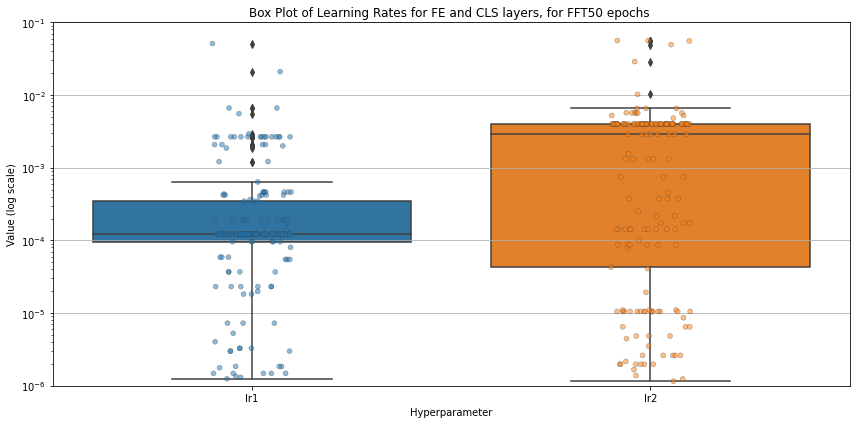

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

size = 1

df_fig = df[ df.model_size == size ]

# Filter variables of interest
variables_of_interest = ['lr1', 'lr2', 'loss_function']
data_subset = df_fig[variables_of_interest]

# Melt the dataframe to long format with respect to hyperparameters
melted_df = data_subset.melt(id_vars='loss_function', var_name='Hyperparameter', value_name='Value')

# Create the box plot with jittered dots, split by loss_function
plt.figure(figsize=(12, 6))
# sns.boxplot(x='Hyperparameter', y='Value', hue='loss_function', data=melted_df, whis=1.5)
# sns.stripplot(x='Hyperparameter', y='Value', hue='loss_function', data=melted_df,
#               dodge=True, jitter=True, alpha=0.5, marker='o', edgecolor='gray', linewidth=0.5)

sns.boxplot(x='Hyperparameter', y='Value',  data=melted_df, whis=1.5)
sns.stripplot(x='Hyperparameter', y='Value',  data=melted_df,
              dodge=True, jitter=True, alpha=0.5, marker='o', edgecolor='gray', linewidth=0.5)

plt.yscale("log")
plt.ylim(1e-6, 1e-1)
# plt.title('Box Plot of Learning Rates by Loss Function')
plt.title('Box Plot of Learning Rates for FE and CLS layers, for FFT50 epochs ')
plt.ylabel('Value (log scale)')
plt.grid(True, axis='y')
plt.tight_layout()

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles[:2], labels[:2], title='Loss Function')

plt.show()
